### Logistic Regression Project: Online Shoppers Purchasing Intention with Python

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve


In [44]:
# Veriyi yükle
df = pd.read_csv("online_shoppers_intention.csv")
# https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset

# İlk 5 satıra göz at
print("🔎 İlk 5 satır:")
print(df.head())

🔎 İlk 5 satır:
   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0      

In [45]:
# Veri kümesinin genel bilgisi
print("\n📋 Veri kümesi bilgisi:")
print(df.info())


📋 Veri kümesi bilgisi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14

In [46]:
# Eksik veri var mı?
print("\n🧹 Eksik veri kontrolü:")
print(df.isnull().sum()) #Her bir sütunda eksik veri olup olmadığını gösterir.


🧹 Eksik veri kontrolü:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [47]:
# Veri çerçevesinin temel istatistiklerine göz atalım
print(df.describe())

       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.00000

#### 1. Kategorik Verilerin Dönüştürülmesi
Month, VisitorType, ve Weekend sütunları makine öğrenmesi algoritmaları için sayısal hale getirilmeli (örn. OneHotEncoding veya LabelEncoding).

countplot: Kategorik verinin kaç kez geçtiğini gösterir.

hue='Revenue': Her sınıfı farklı renkte gösterir.

palette='viridis': Renk skalası.

figsize: Grafik boyutu.

💰 Satın Alma Oranı:
 Revenue
False    0.845255
True     0.154745
Name: proportion, dtype: float64


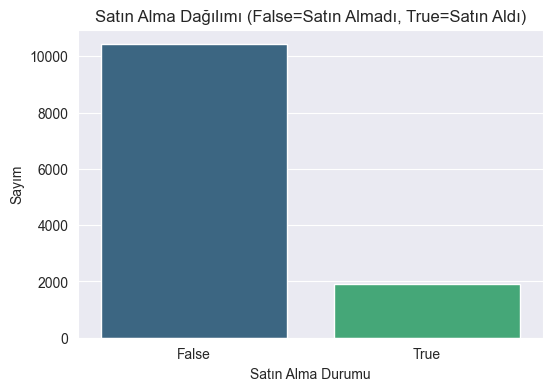

In [48]:
# Revenue dağılımı
print("💰 Satın Alma Oranı:\n", df['Revenue'].value_counts(normalize=True))

# Düzeltilmiş görselleştirme
plt.figure(figsize=(6,4)) # Çizim Boyutu Nasıl Değiştirilir.
sns.countplot(data=df, x='Revenue', palette='viridis', hue='Revenue', legend=False)
plt.title('Satın Alma Dağılımı (False=Satın Almadı, True=Satın Aldı)')
plt.xlabel('Satın Alma Durumu')
plt.ylabel('Sayım')
plt.show()

Kategorik Değişkenleri Sayısallaştırma (One-Hot Encoding)

Neden?: Modelimiz yalnızca sayısal verileri anlar. Month, VisitorType gibi kategorik sütunları sayısal forma çevirmeliyiz.

**pd.get_dummies():** Bu fonksiyon, kategorik sütunları sayısal verilere dönüştürür. drop_first=True parametresi, ilk sütununun çıkarılmasını sağlar. Bu, multicollinearity (çoklu doğrusal ilişki) riskini azaltır.
pd.get_dummies(): Kategorik değişkenleri sayısal (0-1) vektörlere dönüştürür.

drop_first=True: İlk kategoriyi referans alarak düşürür (multicollinearity'yi önler).

Revenue sütunu boolean (True/False) olduğu için .astype(int) ile 1 ve 0’a dönüştürülüyor.


pd.get_dummies(): Kategorik sütunları dummy/sayısal sütunlara çevirir.

drop_first=True: İlk kategori düşülür, multicollinearity (çoklu doğrusal ilişki) önlenir.

astype(int): Revenue True/False → 1/0 dönüşümü.

In [49]:
# 1. Kategorik sütunları seç
kategorik_sutunlar = ['Month', 'VisitorType', 'Weekend']

# 2. One-Hot Encoding uygula (Pandas ile)
df_encoded = pd.get_dummies(df, columns=kategorik_sutunlar, drop_first=True)

# 3. Revenue'yi int'e çevir (True/False -> 1/0)
df_encoded['Revenue'] = df_encoded['Revenue'].astype(int)

# 4. Kontrol et
print("🔄 Dönüştürülen Veri:\n", df_encoded.iloc[0:3, -10:])  # Son 10 sütundan örnek

🔄 Dönüştürülen Veri:
    Month_Jul  Month_June  Month_Mar  Month_May  Month_Nov  Month_Oct  \
0      False       False      False      False      False      False   
1      False       False      False      False      False      False   
2      False       False      False      False      False      False   

   Month_Sep  VisitorType_Other  VisitorType_Returning_Visitor  Weekend_True  
0      False              False                           True         False  
1      False              False                           True         False  
2      False              False                           True         False  


#### Veri Özelliklerinin ve Hedef Değişkenin Ayrılması: - Feature ve Target Ayırma
Şimdi, verimizin özelliklerini (bağımsız değişkenler) ve hedef değişkenini (bağımlı değişken) ayıralım.

X: Özellikler (bağımsız değişkenler). Burada tüm sütunları kullanacağız, ama Revenue hedef değişken olduğu için bunu dışarıda bırakacağız.

y: Hedef değişken (bağımlı değişken). Bu durumda Revenue sütununu hedef değişken olarak alacağız.

In [50]:
from sklearn.model_selection import train_test_split

# 1. Feature (X) ve Target (y) ayırma
X = df_encoded.drop('Revenue', axis=1)  # Tüm sütunlar except Revenue
y = df_encoded['Revenue']               # Hedef değişken

# 2. %70 train - %30 test olarak ayır (stratify=y ile oranları koru)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y  # Sınıf dengesizliğini korur
)

# 3. Kontrol
print(f"✅ Eğitim seti: {X_train.shape[0]} örnek")
print(f"✅ Test seti: {X_test.shape[0]} örnek")
print("\n💰 Sınıf Dağılımı (Train):\n", y_train.value_counts(normalize=True))

✅ Eğitim seti: 8631 örnek
✅ Test seti: 3699 örnek

💰 Sınıf Dağılımı (Train):
 Revenue
0    0.845209
1    0.154791
Name: proportion, dtype: float64


X (Features): Revenue hariç tüm sütunlar

y (Target): Sadece Revenue sütunu

stratify=y: Hem train hem test setinde %15.5 satın alma oranını koruduk

ÖZELLİK ÖLÇEKLENDİRME (Feature Scaling)


('num', StandardScaler(), numeric_cols): num: Bu dönüşüme verdiğimiz isim (istediğin isim olabilir).

StandardScaler(): Seçilen sütunlarda ortalama = 0, std = 1 olacak şekilde dönüştürme yapar.

numeric_cols: Bu dönüşüm sadece bu sütunlara uygulanır.

remainder='passthrough': Geriye kalan sütunlar (örneğin one-hot encoded sütunlar) dokunulmadan olduğu gibi bırakılır.

 4. Sütun isimlerini düzgün şekilde al:
ColumnTransformer çıktısı numpy array olarak gelir ve sütun isimlerini kaybeder.

Bu satırda:

Önce numeric_cols (scale edilenler)

Ardından one-hot encoded sütunlar (dokunulmamış olanlar)

Bu sırayla yeni sütun isimlerini tekrar oluşturuyoruz.


In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import pandas as pd

# 1. Sadece gerçek sayısal sütunları seç (one-hot'lar hariç)
numeric_cols = ['Administrative', 'Administrative_Duration', 'Informational',
                'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

# 2. ColumnTransformer tanımla
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols)
    ],
    remainder='passthrough'  # Diğer sütunlara dokunma
)

# 3. Fit ve transform işlemleri
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# 4. Sütun isimlerini düzgün şekilde al
new_columns = numeric_cols + [col for col in X_train.columns if col not in numeric_cols]

# 5. DataFrame'e çevir
X_train_scaled = pd.DataFrame(X_train_scaled, columns=new_columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=new_columns)

# 6. Kontrol çıktısı
print("✅ Düzgün Çalışan Scaled Veri Örneği:")
print(X_train_scaled.iloc[:3, :5])  # İlk 3 satır, ilk 5 sütun

✅ Düzgün Çalışan Scaled Veri Örneği:
  Administrative Administrative_Duration Informational Informational_Duration  \
0       0.508153               -0.198584     -0.394853              -0.243254   
1      -0.396834               -0.227254     -0.394853              -0.243254   
2      -0.698497               -0.451319     -0.394853              -0.243254   

  ProductRelated  
0      -0.399248  
1      -0.283475  
2      -0.422403  


In [52]:
print("🔍 Veri Tipleri:\n", X_train_scaled.dtypes)

🔍 Veri Tipleri:
 Administrative                   object
Administrative_Duration          object
Informational                    object
Informational_Duration           object
ProductRelated                   object
ProductRelated_Duration          object
BounceRates                      object
ExitRates                        object
PageValues                       object
SpecialDay                       object
OperatingSystems                 object
Browser                          object
Region                           object
TrafficType                      object
Month_Dec                        object
Month_Feb                        object
Month_Jul                        object
Month_June                       object
Month_Mar                        object
Month_May                        object
Month_Nov                        object
Month_Oct                        object
Month_Sep                        object
VisitorType_Other                object
VisitorType_Returning_V

In [53]:
# Sayısal sütunları seç
numeric_cols = ['Administrative', 'Administrative_Duration', 'Informational',
               'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
               'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

# Tip dönüşümü
X_train_scaled[numeric_cols] = X_train_scaled[numeric_cols].astype(float)
X_test_scaled[numeric_cols] = X_test_scaled[numeric_cols].astype(float)

In [54]:
# One-Hot encoded sütunları seç
categorical_cols = [col for col in X_train_scaled.columns if col not in numeric_cols]

# Tip dönüşümü
X_train_scaled[categorical_cols] = X_train_scaled[categorical_cols].astype(int)
X_test_scaled[categorical_cols] = X_test_scaled[categorical_cols].astype(int)

1. LogisticRegression
class_weight='balanced': Sınıf dengesizliği varsa (örneğin 1'ler azsa), bu parametre ağırlıkları otomatik ayarlar.

max_iter=1000: Modelin maksimum iterasyon sayısı. Büyük veri veya yavaş öğrenme durumlarında yükseltilir.

random_state=42: Rastgeleliği sabitlemek için kullanılır.

2. RandomForestClassifier
n_estimators=100: 100 tane karar ağacı kullanılır.

class_weight='balanced': Azınlık sınıfı daha azsa dengelemek için kullanılır.

random_state=42: Tekrarlanabilirlik için.

3. XGBClassifier
eval_metric="logloss": Kayıp fonksiyonu olarak log loss kullanılır. Sınıflandırma için uygundur.

random_state=42: Sabitlik.

enable_categorical=True: XGBoost artık native categorical destekliyor (özellikle tree_method='hist' ile).

tree_method='hist': Daha hızlı histogram tabanlı ayrım yapar. Büyük veride önerilir.

scale_pos_weight: Sınıf dengesizliğini düzeltmek için pozitif sınıfı (1 olanları) ağırlıklandırır.

Formül: negatif_sayı / pozitif_sayı

4. GaussianNB():
Naive Bayes modelidir. Normal dağılıma göre çalışır, parametresiz çalıştırılmış.

5. DecisionTreeClassifier
class_weight='balanced': Dengesiz veri için önemlidir.

random_state=42: Sabitlik sağlar.

6. SVC
class_weight='balanced': Azınlık sınıfın doğru temsil edilmesi için.

probability=True: Modelin predict_proba() ile olasılık tahmini yapabilmesini sağlar.

random_state=42: Sonuçları sabit tutar.

------------------------

model.fit(X_train, y_train)
Modeli eğitim verisi ile eğitir.

model.predict(X_test)
Test verisi ile tahmin yapar.

model.predict_proba(X_test)[:, 1]
Model olasılık tahmini yapabiliyorsa, 1 sınıfına ait olasılığı alır.

hasattr(..., "predict_proba"): Eğer modelde bu fonksiyon varsa çalıştırılır. Yoksa yerine [0]*len(X_test) yazılır (örneğin SVM’de bu özellik olmadan çalıştırılırsa hata verir).

classification_report(y_test, y_pred, output_dict=True)
Doğruluk, kesinlik, geri çağırma ve F1 skorlarını döner.

output_dict=True: Sözlük formatında döndürür.

roc_auc_score(y_test, y_proba)
ROC eğrisinin altında kalan alanı hesaplar. Modelin ayrım gücünü gösterir.

Olasılık tahmini olmayan modellerde None olarak kaydedilir.



In [55]:
# 1. Veri tiplerini düzelt
numeric_cols = ['Administrative', 'Administrative_Duration', 'Informational',
               'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
               'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
categorical_cols = [col for col in X_train_scaled.columns if col not in numeric_cols]

X_train_scaled[numeric_cols] = X_train_scaled[numeric_cols].astype(float)
X_train_scaled[categorical_cols] = X_train_scaled[categorical_cols].astype(int)
X_test_scaled[numeric_cols] = X_test_scaled[numeric_cols].astype(float)
X_test_scaled[categorical_cols] = X_test_scaled[categorical_cols].astype(int)

# 2. Model sözlüğünü güncelle
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(
        eval_metric="logloss",
        random_state=42,
        enable_categorical=True,
        tree_method='hist',
        scale_pos_weight=(len(y_train)-sum(y_train))/sum(y_train)
    ),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "SVM": SVC(class_weight='balanced', probability=True, random_state=42)
}

# 3. Model eğitim fonksiyonu
def train_and_evaluate(models, X_train, y_train, X_test, y_test):
    results = []
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else [0]*len(X_test)

        report = classification_report(y_test, y_pred, output_dict=True)
        results.append({
            'Model': name,
            'Accuracy': report['accuracy'],
            'Precision (1)': report['1']['precision'],
            'Recall (1)': report['1']['recall'],
            'F1 (1)': report['1']['f1-score'],
            'ROC AUC': roc_auc_score(y_test, y_proba) if hasattr(model, "predict_proba") else None
        })
    return pd.DataFrame(results)

# 4. Çalıştır ve sonuçları göster
results_df = train_and_evaluate(models, X_train_scaled, y_train, X_test_scaled, y_test)
print("🏆 Model Performans Karşılaştırması:")
display(results_df.sort_values('ROC AUC', ascending=False))

🏆 Model Performans Karşılaştırması:


,Model,Accuracy,Precision (1),Recall (1),F1 (1),ROC AUC
1,Random Forest,0.899973,0.748768,0.531469,0.621677,0.919289
2,XGBoost,0.879427,0.599684,0.662587,0.629568,0.912596
0,Logistic Regression,0.853204,0.517491,0.750000,0.612420,0.900453
5,SVM,0.866450,0.551724,0.727273,0.627451,0.894913
3,Naive Bayes,0.678832,0.302564,0.825175,0.442777,0.810961
4,Decision Tree,0.860503,0.552434,0.515734,0.533454,0.719652


#### En İyi Modelin Hiperparametre Optimizasyonu (Random Forest için)

In [56]:
from sklearn.model_selection import GridSearchCV

# Random Forest parametre grid'i
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced', {0:1, 1:3}]
}

# GridSearchCV
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# En iyi parametreler
print("🎯 En İyi Parametreler:", grid_search.best_params_)

🎯 En İyi Parametreler: {'class_weight': {0: 1, 1: 3}, 'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}


### ROC Eğrilerinin Karşılaştırılması

✅ Her model için ROC eğrisi çizilir. predict_proba fonksiyonu olmayan modeller (örneğin bazı SVM türleri) atlanır.
✅ roc_auc_score: Modelin pozitif sınıfı ne kadar iyi ayırt ettiğini gösteren bir skor. 1’e ne kadar yakınsa o kadar iyi.

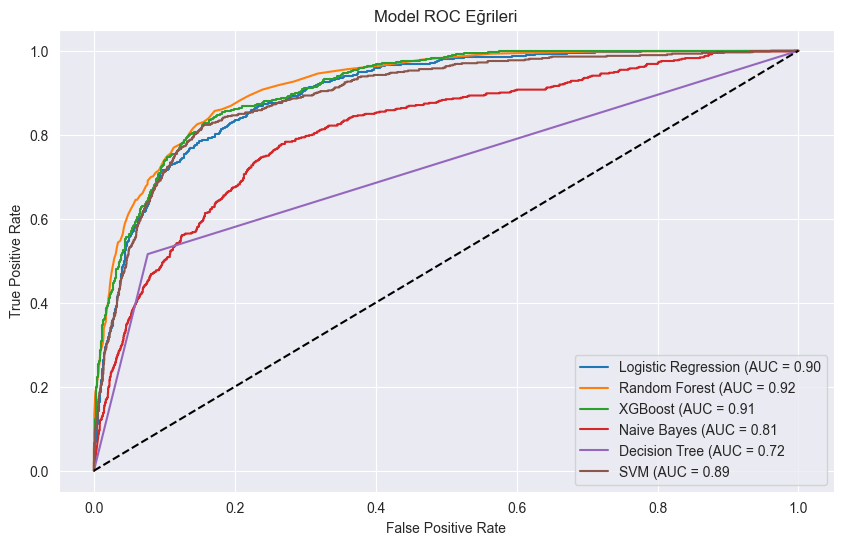

In [57]:
plt.figure(figsize=(10, 6))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_scaled)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_proba):.2f}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Model ROC Eğrileri')
plt.legend()
plt.show()

### Özellik Önemlilik Analizi (XGBoost ve Random Forest için)

✅ feature_importances_: XGBoost’un öğrenme sırasında hangi özellikleri daha çok kullandığını belirtir.
✅ Bu sayede modelin hangi değişkenleri karar verirken önemsediğini görebiliriz.

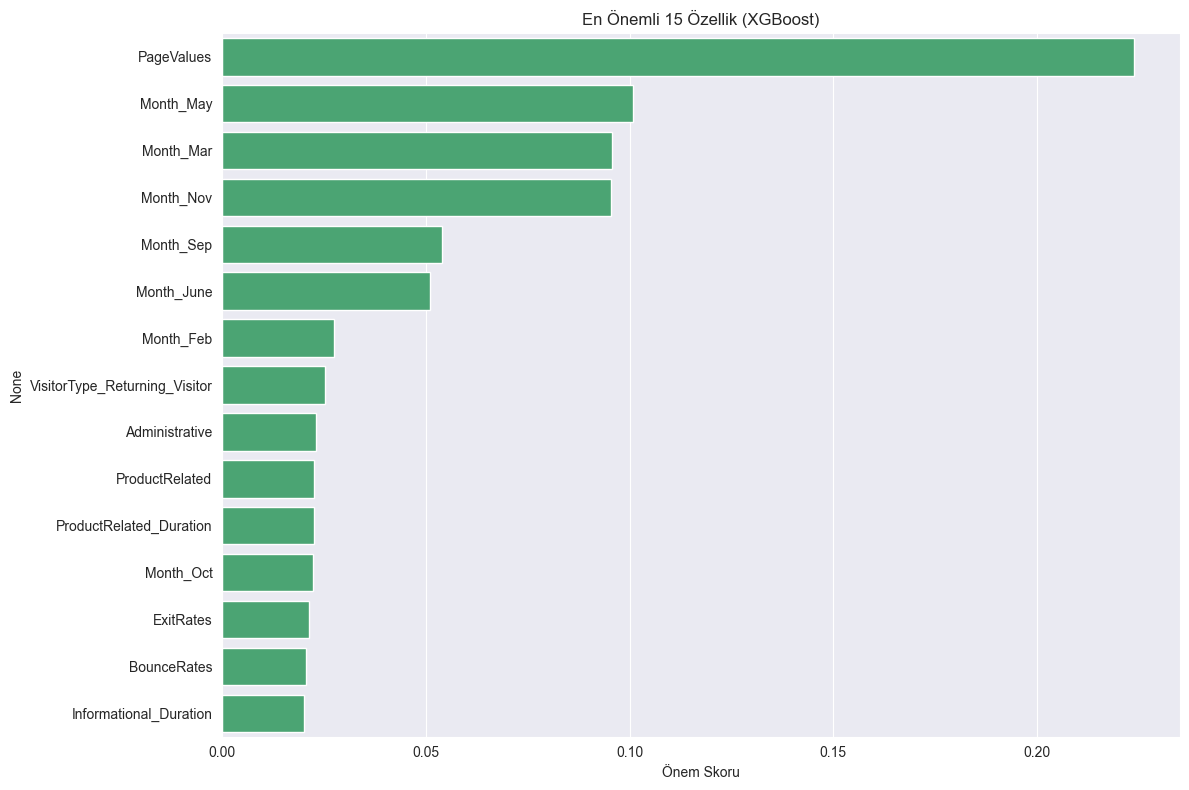

In [58]:
# XGBoost Feature Importance
importances = pd.Series(models["XGBoost"].feature_importances_, index=X_train_scaled.columns)
top_features = importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_features.values, y=top_features.index, color='mediumseagreen')
plt.title('En Önemli 15 Özellik (XGBoost)')
plt.xlabel('Önem Skoru')
plt.tight_layout()
plt.show()

#### Threshold Optimizasyonu (Recall-Precision Trade-off)

✅ Threshold ayarlamak, modeli "daha hassas" ya da "daha seçici" yapar.

Precision: Pozitif dediğin örneklerin gerçekten pozitif olma oranı

Recall: Gerçek pozitiflerin ne kadarını bulduğun

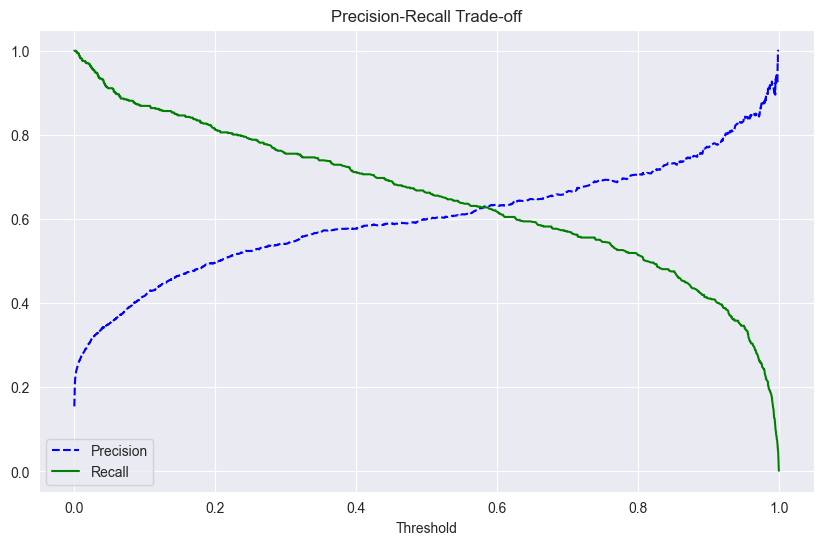

In [59]:
from sklearn.metrics import precision_recall_curve

# XGBoost için threshold ayarı
y_proba = models["XGBoost"].predict_proba(X_test_scaled)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], 'b--', label='Precision')
plt.plot(thresholds, recall[:-1], 'g-', label='Recall')
plt.xlabel('Threshold')
plt.title('Precision-Recall Trade-off')
plt.legend()
plt.show()

Optimize Edilmiş Random Forest Modeli:

✅ Bu parametreler overfitting’i önleyip dengesiz verilerde daha adil tahmin yapar.
✅ class_weight: Sınıflar dengesiz olduğunda minor sınıfın (1) daha önemli olduğunu belirtir.

✅ classification_report: Precision, recall, f1 gibi metrikleri gösterir.
✅ roc_auc_score: Modelin genel ayırt edebilme gücünü ölçer.



In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Optimize edilmiş model
best_rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    class_weight={0:1, 1:3},  # Minor sınıfa 3x ağırlık
    random_state=42,
    n_jobs=-1
)

# Eğitim ve tahmin
best_rf.fit(X_train_scaled, y_train)
y_pred = best_rf.predict(X_test_scaled)
y_proba = best_rf.predict_proba(X_test_scaled)[:,1]

# Performans raporu
print("📊 Final Model Performansı:\n", classification_report(y_test, y_pred))
print("🎯 ROC AUC:", roc_auc_score(y_test, y_proba))

📊 Final Model Performansı:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      3127
           1       0.70      0.60      0.65       572

    accuracy                           0.90      3699
   macro avg       0.82      0.78      0.79      3699
weighted avg       0.89      0.90      0.90      3699

🎯 ROC AUC: 0.9198057299272522


 Karışıklık Matrisi Görselleştirme:

✅ Hangi sınıftan kaçı doğru / yanlış tahmin edildiğini grafiksel olarak gösterir.

<Figure size 800x600 with 0 Axes>

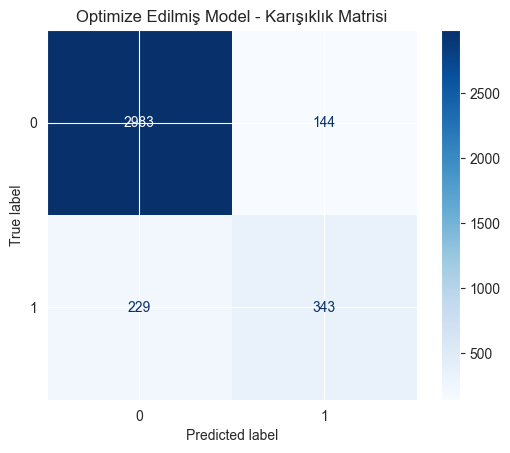

In [61]:
plt.figure(figsize=(8,6))
ConfusionMatrixDisplay.from_estimator(best_rf, X_test_scaled, y_test, cmap='Blues')
plt.title('Optimize Edilmiş Model - Karışıklık Matrisi')
plt.show()

Özellik Önemlilik Analizi:

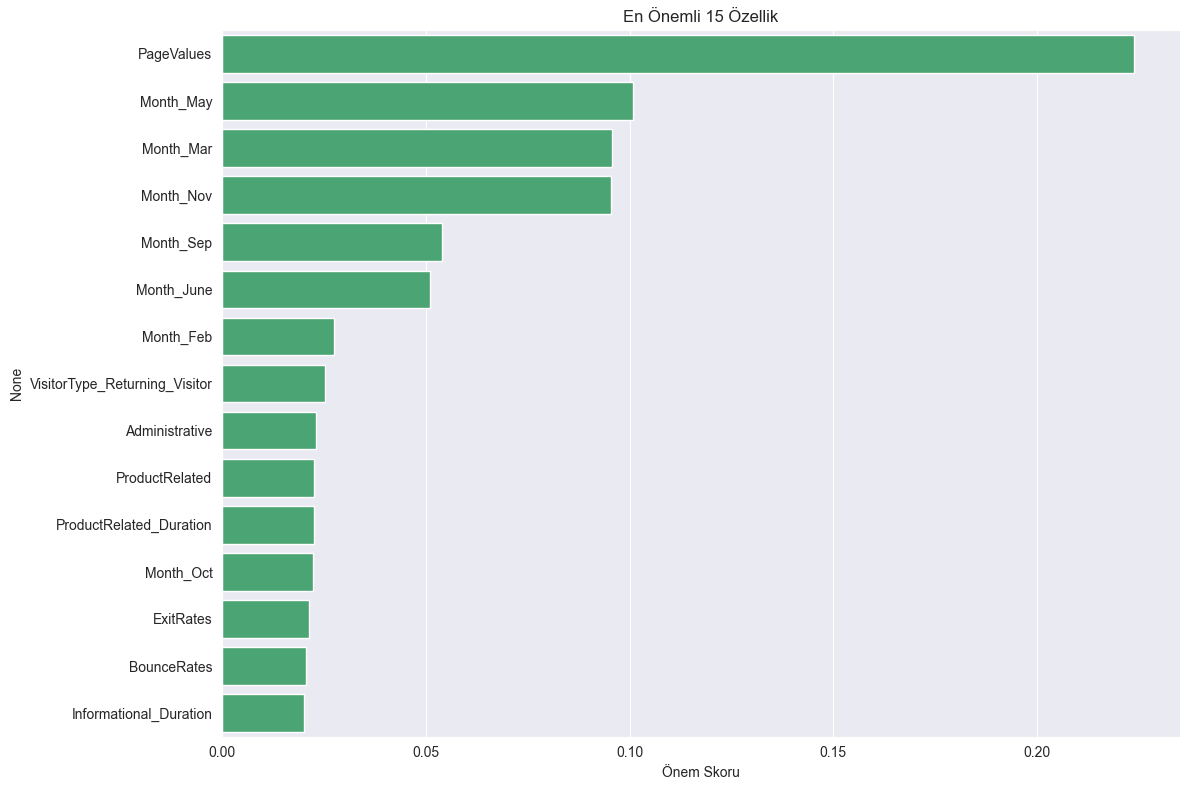

In [62]:
plt.figure(figsize=(12,8))
sns.barplot(x=top_features.values, y=top_features.index, color='mediumseagreen')
plt.title('En Önemli 15 Özellik')
plt.xlabel('Önem Skoru')
plt.tight_layout()
plt.show()


Model Performans Derinlemesine Analiz

✅ Bu eğri, özellikle dengesiz sınıflarda Accuracy yerine tercih edilen bir grafik.
✅ average_precision_score: Eğrinin altında kalan alanı temsil eder, 1’e ne kadar yakınsa o kadar iyi.

✅ Veri setindeki sınıflar dengesiz mi? Model daha çok hangi sınıfa eğilimli? Bu analizle görülür.

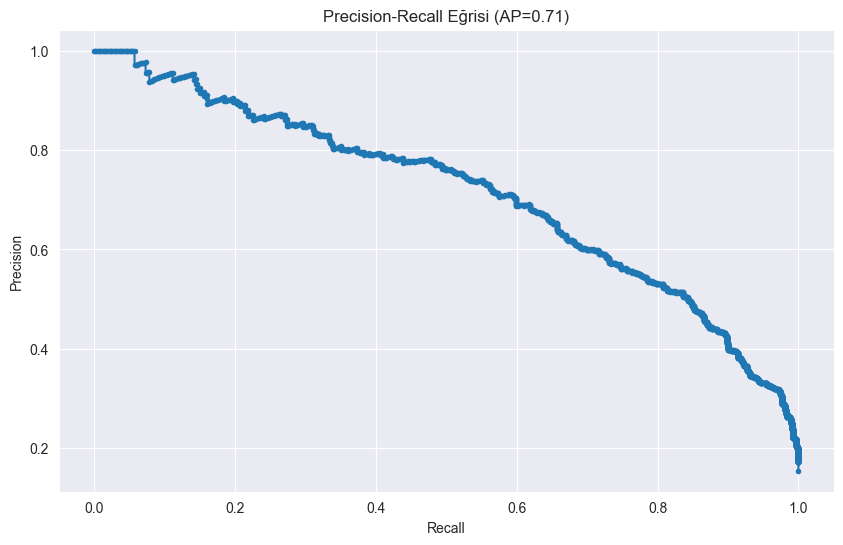


💰 Gerçek vs Tahmini Dağılım:
   Gerçek  Tahmini
0    3127     3212
1     572      487


In [63]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Precision-Recall Eğrisi
precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(10,6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Eğrisi (AP={:.2f})'.format(average_precision_score(y_test, y_proba)))
plt.show()

# Sınıf Dağılımı Kontrolü
print("\n💰 Gerçek vs Tahmini Dağılım:")
print(pd.DataFrame({
    'Gerçek': y_test.value_counts(),
    'Tahmini': pd.Series(y_pred).value_counts()
}))

Model Kaydetme ve Yükleme Testi

✅ joblib.dump: Modeli, scaler’ı ve özellik isimlerini .pkl dosyasında saklar.

✅ joblib.load: Daha sonra bu modeli yükleyerek yeni veriler üzerinde tahmin yapılabilir.

In [64]:
import joblib

# Model ve ön işlemeyi kaydet
joblib.dump({
    'model': best_rf,
    'scaler': preprocessor,
    'feature_names': list(X_train_scaled.columns)
}, 'shopper_model_v1.pkl')

# Test amaçlı yükleme
loaded = joblib.load('shopper_model_v1.pkl')
print("\n✅ Model başarıyla kaydedildi ve yüklendi. Test skoru:",
      loaded['model'].score(X_test_scaled, y_test))


✅ Model başarıyla kaydedildi ve yüklendi. Test skoru: 0.8991619356582861
